# <center>Life Expectancy and GDP:<center> #
## <center>Relationships for Six Countries<center> ##
### <center>(Chile, China, Germany, Mexico, the United States and Zimbabwe)<center> ###

 ![ALT_TEXT_FOR_SCREEN_READERS](https://cdn-res.keymedia.com/cms/images/us/018/0311_638204357273887975.jpg) 



In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math
from pandas.plotting import autocorrelation_plot

In [5]:
gdp_life = pd.read_csv('all_data.csv')
# print(gdp_life.head())
# gdp_life.info()
# gdp_life.describe()



## The Impact of National Wealth on Life Expectancy ##

While the world has faced major economic upheavals in recent years, both from the pandemic and from numerous other international events (e.g., Russia's invasion of Ukraine, Israel's invasion of Gaza, the rapid onset of climate change's impacts), the World Bank and the World Health Organization have shown increased awareness of how GDP and life expectancy are connected with one another. 

In the findings from research conducted by these two institutions, a selection of six countries with very different economic backgrounds and trajectories were selected to assess what links could be found between GDP and the increase or decrease of life expectancy from birth. These six countries were Chile, China, Germany, Mexico, the United States and Zimbabwe. These includ both longstanding global leaders in economic development as well as those who have seen a rapid increase in growth or have started towards improved development. 

What the research shows is that there does appear to be some connection between the growth of GDP and the increase in life expectancy, but perhaps not in the intended way. The first thing to consider is the variation in life spans for each of these respective countries. Right away, there is a clear connection between development and life expectancy, though with limited returns. 

In [17]:
chile_2000 = gdp_life[(gdp_life['Country'] == 'Chile') & (gdp_life['Year'] == 2000)]
chile_2015 = gdp_life[(gdp_life['Country'] == 'Chile') & (gdp_life['Year'] == 2015)]
chile_2000_life = chile_2000['Life expectancy at birth (years)']
chile_2015_life = chile_2015['Life expectancy at birth (years)']

countries = ['Chile', 'China', 'Germany', 'Mexico', 'United States of America', 'Zimbabwe']

for country in countries:
    country_2000 = gdp_life[(gdp_life['Country'] == country) & (gdp_life['Year'] == 2000)]
    country_2015 = gdp_life[(gdp_life['Country'] == country) & (gdp_life['Year'] == 2015)]
    country_2000_life = country_2000['Life expectancy at birth (years)'].values[0]
    country_2015_life = country_2015['Life expectancy at birth (years)'].values[0]
    print(f'The average life expectancy for {country} in 2000 was {country_2000_life} years, whereas it was {country_2015_life} years by 2015.')

The average life expectancy for Chile in 2000 was 77.3 years, whereas it was 80.5 years by 2015.
The average life expectancy for China in 2000 was 71.7 years, whereas it was 76.1 years by 2015.
The average life expectancy for Germany in 2000 was 78.0 years, whereas it was 81.0 years by 2015.
The average life expectancy for Mexico in 2000 was 74.8 years, whereas it was 76.7 years by 2015.
The average life expectancy for United States of America in 2000 was 76.8 years, whereas it was 79.3 years by 2015.
The average life expectancy for Zimbabwe in 2000 was 46.0 years, whereas it was 60.7 years by 2015.


Though the years largely fall within the same decade, Zimbabwe stands out as significantly lower than the others. The driving factor for this is the high infant mortality rate in Zimbabwe largely due to high levels of poverty, underdevelopment and a lack of access to both healthcare and education (especially maternal education). 

## Life Expectancy for Six Countries: Chile, China, Germany, Mexico, the United States and Zimbabwe ##

We see an increase in life expectancy overall for all listed countries in the longterm. However, there are some noticeable observations in the data. There is a consistent increase in life expectancy over the designated timespan for China, Germany and the United States, yet the other countries display more erratic behavior in the short term. 

In Chile, the expected lifespan at birth showed both years of stagnation and years of decrease between 2006-2012. Outside of these years, we observe a consistent increase. 

Mexico illustrates a more disturbing case, with massive increases and decreases from year to year or periods of stagnation. Out of all 
countries, it has the least consistency overall. 

Unlike these other two abnormal cases, Zimbabwe shows a good deal of consistency, yet not always in the direction one would hope. There is a steady decline in life expectancy in the early 2000s, which is then reversed from the latter 2000s onwards (at which point a rapid increase is observed). 

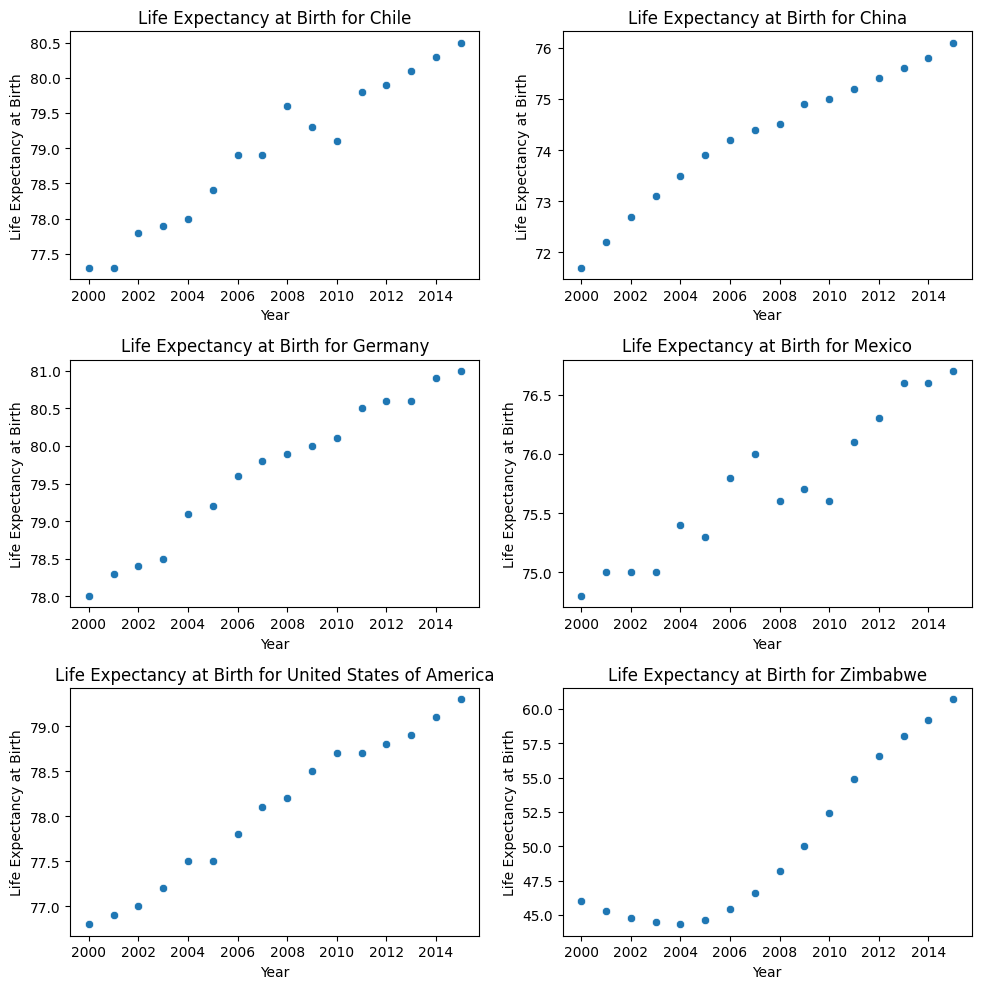

<Figure size 640x480 with 0 Axes>

In [18]:
countries = ['Chile', 'China', 'Germany', 'Mexico', 'United States of America', 'Zimbabwe']
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
axes = axes.flatten() #Flatten the 3x2 array of axes to a ID array for easier indexing 

for i, country in enumerate(countries):
    # Create Country Dataset
    country_data = gdp_life[gdp_life['Country'] == country]

    # Create a scatterplot for the 'i'th subplot
    sns.scatterplot(x='Year', y='Life expectancy at birth (years)', data=country_data, ax=axes[i])

    # Set up the labels for the graphs:
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Life Expectancy at Birth')
    axes[i].set_title(f'Life Expectancy at Birth for {country}')

plt.tight_layout()
plt.show()
plt.clf()

## GDP by Year for Six Countries: Chile, China, Germany, Mexico, the United States and Zimbabwe ##

When the increase (or decrease, in some cases) in life expectancy is compared with these graphs mapping the GDP growth, there is a noticeable similarity in most cases where increases in GDP aligns with an increase in life expectancy (and vice versa). 

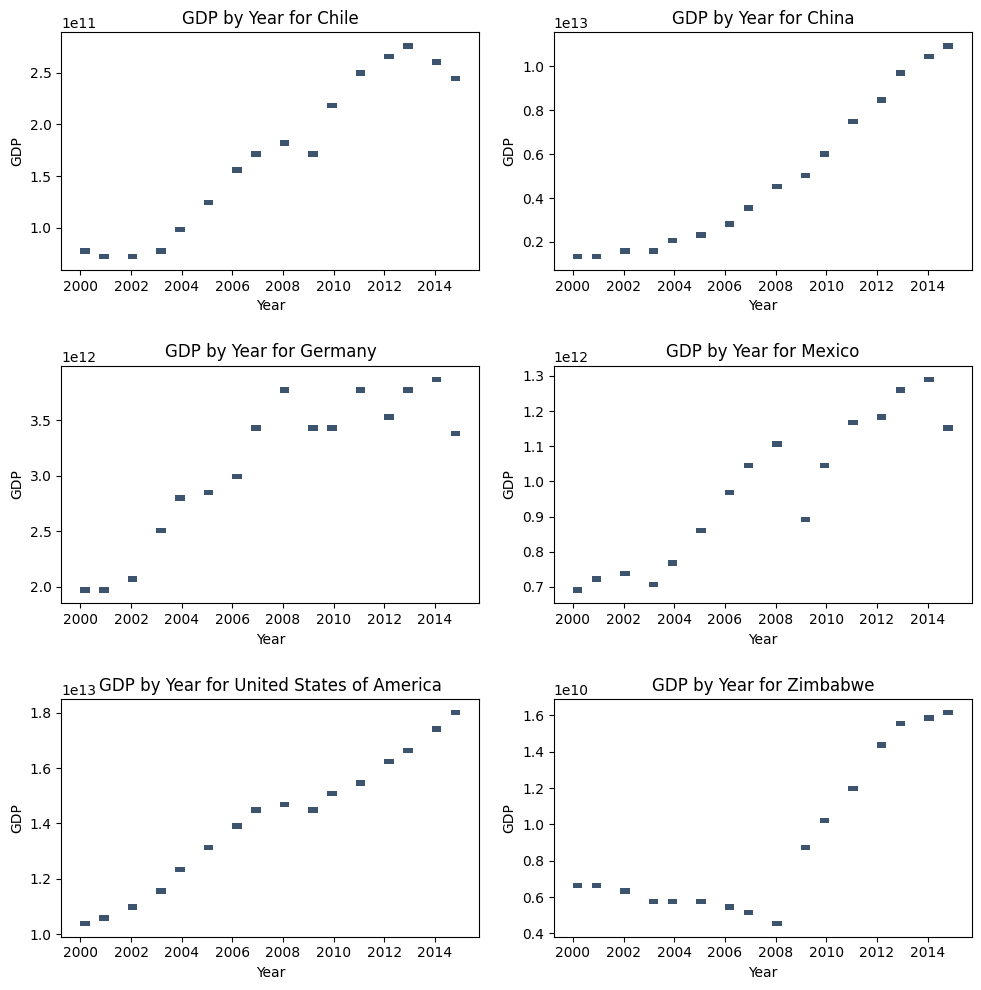

<Figure size 640x480 with 0 Axes>

In [19]:
# Create a dataset to map out the GDP by Year for each country:

countries = ['Chile', 'China', 'Germany', 'Mexico', 'United States of America', 'Zimbabwe']
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
axes = axes.flatten() #Flatten the 3x2 array of axes to a ID array for easier indexing 

for i, country in enumerate(countries):
    # Create country dataset
    country_data = gdp_life[gdp_life['Country'] == country]

    # Create a histogram for the i'th subplot
    sns.histplot(x='Year', y='GDP', data=country_data, bins=40, ax=axes[i])

    # Set up labels for histograms
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('GDP')
    axes[i].set_title(f'GDP by Year for {country}')

plt.tight_layout()
plt.show()
plt.clf()

    

## GDP Compared to Life Expectancy for Six Countries: Chile, China, Germany, Mexico, the United States and Zimbabwe ##

The relationship between GDP growth and life expectancy gets some keen insightas when life expectancy is mapped against GDP. The correlation between GPD growth and life expectancy increases is apparent in our previous analysis. However, what stands out with our new comparison is that the size of GDP overall seems to correlate significantly less with life expectancy increases than the actual growth of that GDP. 

In our first figure below, only five countries are included (Chile, China, Germany, Mexico and the United States) due to the fact that Zimbabwe's far lower GDP made it an outlier; however, Zimbabwe is likewise analyzed (and appears to show similar patterns) down below. 

SOME POTENTIAL REASONS FOR THIS!!

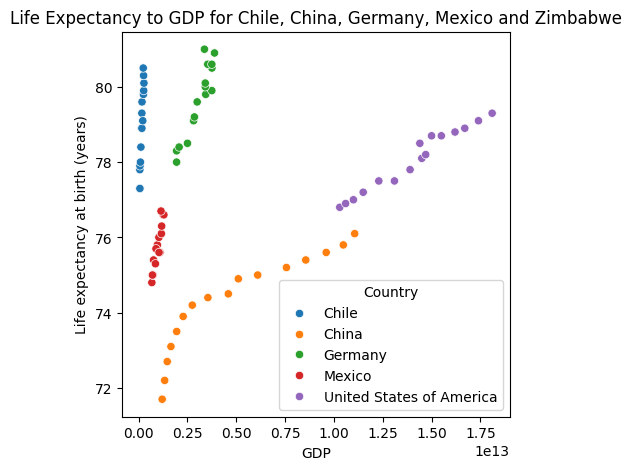

<Figure size 640x480 with 0 Axes>

In [20]:
# Create dataset minus Zimbabwe (it is an outlier)
minus_zim = gdp_life[gdp_life['Country'] != 'Zimbabwe']

# Create figure for dataset
plt.figure(figsize=(5,5))

# Create scatterplot with three variables: (x) gdp, (y) life_expectancy, (hue) country
sns.scatterplot(x='GDP', y='Life expectancy at birth (years)', hue='Country', data=minus_zim)
plt.title('Life Expectancy to GDP for Chile, China, Germany, Mexico and Zimbabwe')
plt.show()
plt.clf()

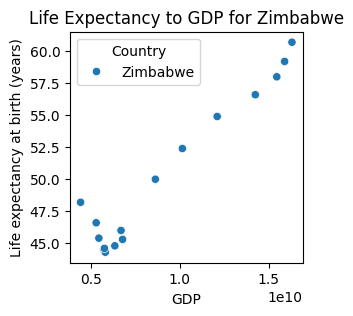

<Figure size 640x480 with 0 Axes>

In [21]:
# Create dataset minus Zimbabwe (it is an outlier)
with_zim = gdp_life[gdp_life['Country'] == 'Zimbabwe']

# Create figure for dataset
plt.figure(figsize=(3,3))

# Create scatterplot with three variables: (x) gdp, (y) life_expectancy, (hue) country
sns.scatterplot(x='GDP', y='Life expectancy at birth (years)', hue='Country', data=with_zim)
plt.title('Life Expectancy to GDP for Zimbabwe')
plt.show()
plt.clf()

## Correlation Analysis for Life Expectancy and GDP ##

### Autocorrelation of Life Expectancy ###

Digging into the details of the data, a noticeable connection between a country's GDP and an increase or decrease in life expectancy is manifested. The life expectancy does illustrate a stronger connection over time than GDP, but it has already been noted how GDP has limited returns, and clearly it is not the sole indicator. For instance, though the US has a higher GDP than Chile during the observed years, the life expectancy still lags behind. However, other notable factors contribute to these numbers, such as lifestyle choices, food regulatory standards and healthcare availability. In other words, even though GDP does have an impact on life expectancy, it is not the sole predictor for an increase or decrease in life expectancy over time. 


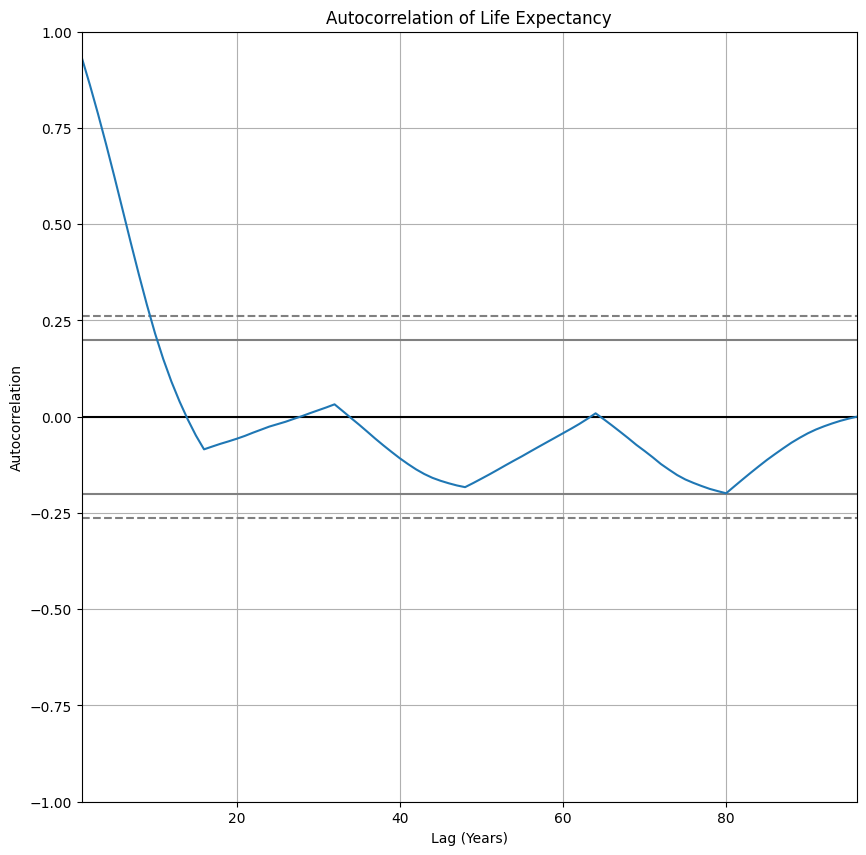

<Figure size 640x480 with 0 Axes>

In [22]:
# Create variables for 'Life Expectancy' and 'GDP' to check autocorrelation
life_expectancy = gdp_life['Life expectancy at birth (years)']
gdp = gdp_life['GDP']

# Check autocorrelation for life expectancy
plt.figure(figsize=(10,10))
autocorrelation_plot(life_expectancy)
plt.title('Autocorrelation of Life Expectancy')
plt.xlabel('Lag (Years)')
plt.ylabel('Autocorrelation')
plt.show()
plt.clf()



### Autocorrelation of GDP ###

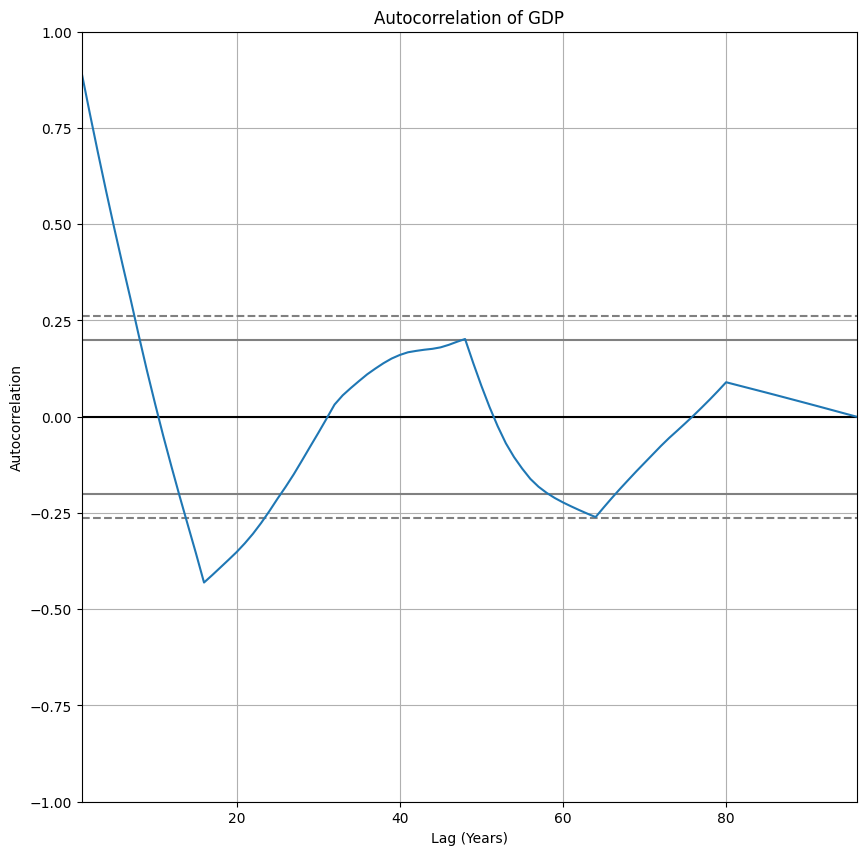

<Figure size 640x480 with 0 Axes>

In [23]:
# Check autocorrelation for GDP
plt.figure(figsize=(10,10))
autocorrelation_plot(gdp)
plt.title('Autocorrelation of GDP')
plt.xlabel('Lag (Years)')
plt.ylabel('Autocorrelation')
plt.show()
plt.clf()


When the lag plots are incorporated to the analysis, we see an even stronger indication of GDP's impact on life expectancy. Though certain outliers do present themselves, it is overwhelming positively correlated when considering GDP and life expectancy. More precisely, the same trends present in the autocorrelation appear. 

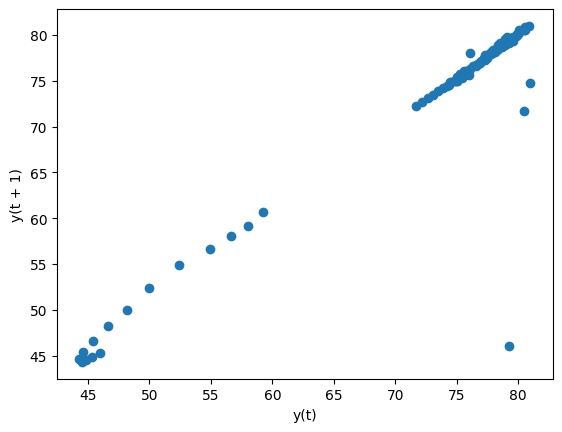

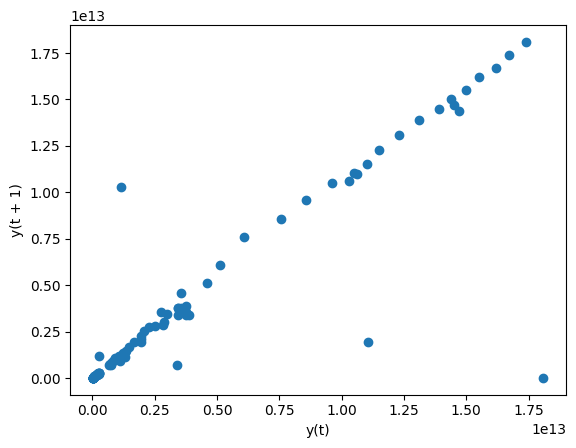

<Figure size 640x480 with 0 Axes>

In [24]:
from pandas.plotting import lag_plot
lag_plot(life_expectancy)
plt.show()
plt.clf()

lag_plot(gdp)
plt.show()
plt.clf()